In [126]:
#importing required libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
from sklearn.linear_model import  ElasticNet
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from scipy.special import boxcox1p
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split,cross_val_score, RandomizedSearchCV
import xgboost
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
import warnings
warnings.filterwarnings('ignore')
sb.set()

In [127]:
#loading data
data = pd.read_csv('Data file.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## EDA and  Data pre-processing

In [128]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [130]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [131]:
# droping 'Id' column for having all unique values
data.drop('Id',1, inplace = True)

In [132]:
# displaying no. of missing values for respective columns
for col in data.columns:
    if data[col].isnull().sum() > 0:
        print(col,': ', data[col].isnull().sum())

LotFrontage :  259
Alley :  1369
MasVnrType :  8
MasVnrArea :  8
BsmtQual :  37
BsmtCond :  37
BsmtExposure :  38
BsmtFinType1 :  37
BsmtFinType2 :  38
Electrical :  1
FireplaceQu :  690
GarageType :  81
GarageYrBlt :  81
GarageFinish :  81
GarageQual :  81
GarageCond :  81
PoolQC :  1453
Fence :  1179
MiscFeature :  1406


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

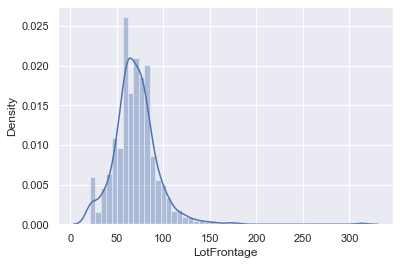

In [133]:
sb.distplot(data['LotFrontage'])

In [134]:
#checkin skewness of column 'LotFrontage'
data['LotFrontage'].skew()

2.163569142324884

In [135]:
# replacing the missing values of column 'LotFrontage' with groupby median
data['LotFrontage'] = data.groupby(['OverallQual'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [136]:
# replacing the missing values of column 'Electrical' with most frequent category
data['Electrical'].replace(np.nan, data['Electrical'].mode()[0],inplace = True)

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

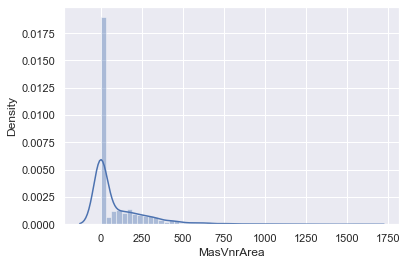

In [137]:
sb.distplot(data.MasVnrArea)

In [138]:
# checking skewness of column 'MasVnrArea'
data['MasVnrArea'].skew()

2.669084210182863

In [139]:
# replacing the missing values of column 'MasVnrArea' with groupby median
data['MasVnrArea'] = data.groupby(['OverallQual'])['MasVnrArea'].transform(lambda x: x.fillna(x.median()))

In [140]:
# replacing the missing values of column 'MasVnrArea' with groupby mode
data['MasVnrType'] = data.groupby(['OverallQual'])['MasVnrType'].transform(lambda x: x.fillna(x.mode()[0]))

In [141]:
# replacing the missing values of all columns pertaining to garage as 'No Garage' category
for col in ['GarageType', 'GarageYrBlt','GarageFinish','GarageQual','GarageCond']:
    data[col].replace(np.nan, 'No Garage', inplace = True)

In [142]:
# replacing the missing values of all columns pertaining to Basement as 'No Bsmt' category
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2']:
    data[col].replace(np.nan, 'No Bsmt', inplace = True)

In [143]:
# replacing the missing values of a particular column with its  'No Category'
for col in ['PoolQC', 'Fence','MiscFeature','Alley','FireplaceQu']:
    data[col].replace(np.nan, 'No '+col, inplace = True)

In [144]:
# label encoding categorical variables for feature selection calculation
data_copy = data.copy()
for col in list(data.select_dtypes(include = 'object').columns):
    le = LabelEncoder()
    data_copy[col] = le.fit_transform(data_copy[col].astype(str).values.reshape(-1,1))   

In [20]:
%%time
# running Recursive Feature Elimination (RFE) Algorithm for selecting optimum combination of features
model = ExtraTreesRegressor(random_state = 0)
rfecv = RFECV(estimator=model, step=1, cv=10, scoring='neg_mean_absolute_error')
rfecv = rfecv.fit(data_copy.drop('SalePrice',1), data['SalePrice'])
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', data_copy.drop('SalePrice',1).columns[rfecv.support_])

Optimal number of features : 34
Best features : Index(['MSZoning', 'LotFrontage', 'LotArea', 'LandContour', 'Neighborhood',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SaleCondition'],
      dtype='object')
Wall time: 10min 47s


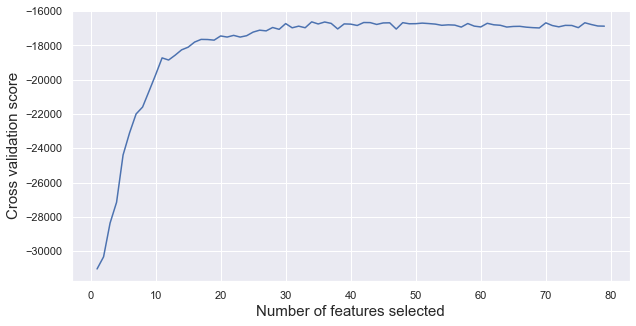

In [21]:
# plotting the result of RFE
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected", fontsize = 15)
plt.ylabel("Cross validation score", fontsize = 15)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [145]:
# selecting the optimum features from the RFE result
X_data = pd.DataFrame(rfecv.transform(data.drop('SalePrice',1)), columns = data_copy.drop('SalePrice',1).columns[rfecv.support_])
data = pd.concat([X_data,data['SalePrice']],1)

In [146]:
data

,MSZoning,LotFrontage,LotArea,LandContour,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice
0,RL,65.0,8450,Lvl,CollgCr,7,5,2003,2003,196.0,...,0,Attchd,2003.0,RFn,2,548,0,61,Normal,208500
1,RL,80.0,9600,Lvl,Veenker,6,8,1976,1976,0.0,...,1,Attchd,1976.0,RFn,2,460,298,0,Normal,181500
2,RL,68.0,11250,Lvl,CollgCr,7,5,2001,2002,162.0,...,1,Attchd,2001.0,RFn,2,608,0,42,Normal,223500
3,RL,60.0,9550,Lvl,Crawfor,7,5,1915,1970,0.0,...,1,Detchd,1998.0,Unf,3,642,0,35,Abnorml,140000
4,RL,84.0,14260,Lvl,NoRidge,8,5,2000,2000,350.0,...,1,Attchd,2000.0,RFn,3,836,192,84,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,7917,Lvl,Gilbert,6,5,1999,2000,0.0,...,1,Attchd,1999.0,RFn,2,460,0,40,Normal,175000
1456,RL,85.0,13175,Lvl,NWAmes,6,6,1978,1988,119.0,...,2,Attchd,1978.0,Unf,2,500,349,0,Normal,210000
1457,RL,66.0,9042,Lvl,Crawfor,7,9,1941,2006,0.0,...,2,Attchd,1941.0,RFn,1,252,0,60,Normal,266500
1458,RL,68.0,9717,Lvl,NAmes,5,6,1950,1996,0.0,...,0,Attchd,1950.0,Unf,1,240,366,0,Normal,142125


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   LotFrontage    1460 non-null   object
 2   LotArea        1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Neighborhood   1460 non-null   object
 5   OverallQual    1460 non-null   object
 6   OverallCond    1460 non-null   object
 7   YearBuilt      1460 non-null   object
 8   YearRemodAdd   1460 non-null   object
 9   MasVnrArea     1460 non-null   object
 10  ExterQual      1460 non-null   object
 11  BsmtQual       1460 non-null   object
 12  BsmtExposure   1460 non-null   object
 13  BsmtFinSF1     1460 non-null   object
 14  TotalBsmtSF    1460 non-null   object
 15  CentralAir     1460 non-null   object
 16  1stFlrSF       1460 non-null   object
 17  2ndFlrSF       1460 non-null   object
 18  GrLivArea      1460 non-null

In [148]:
# creating new feature 'Tot_Liv_Area' by adding columns 'GrLivArea', '1stFlrSF' and '2ndFlrSF'
data['Tot_Liv_Area'] = data['GrLivArea']+data['1stFlrSF']+data['2ndFlrSF']
data.drop(['GrLivArea','1stFlrSF','2ndFlrSF'],1,inplace = True)                            

In [149]:
# creating new feature 'remodel' from column  'YearRemodAdd' and 'YearBuilt'
data['Remodel'] = (data['YearRemodAdd']-data['YearBuilt']).apply(lambda x: 'Yes' if x>0 else 'No')
data.drop('YearRemodAdd',1,inplace = True)

In [150]:
# separating numerical and categorical or discrete variables for separate analysis 
num_col = ['SalePrice','GarageArea','TotalBsmtSF', 'LotArea','BsmtFinSF1',
          'YearBuilt','GarageYrBlt','WoodDeckSF','LotFrontage','OpenPorchSF',
          'MasVnrArea','Tot_Liv_Area']
cat_col = []
for col in data.columns:
    if col not in num_col:
        cat_col.append(col)      

In [151]:
# replacing 'No Garage' with 0 for plotting the feature in scatter plot
data['GarageYrBlt'].replace('No Garage', 0, inplace = True)

In [152]:
# replacing 'object' dtypes with 'float' for columns in num_col list
for col in num_col:
    if str(data[col].dtypes) == 'object':
        data[col] = data[col].astype('float64')

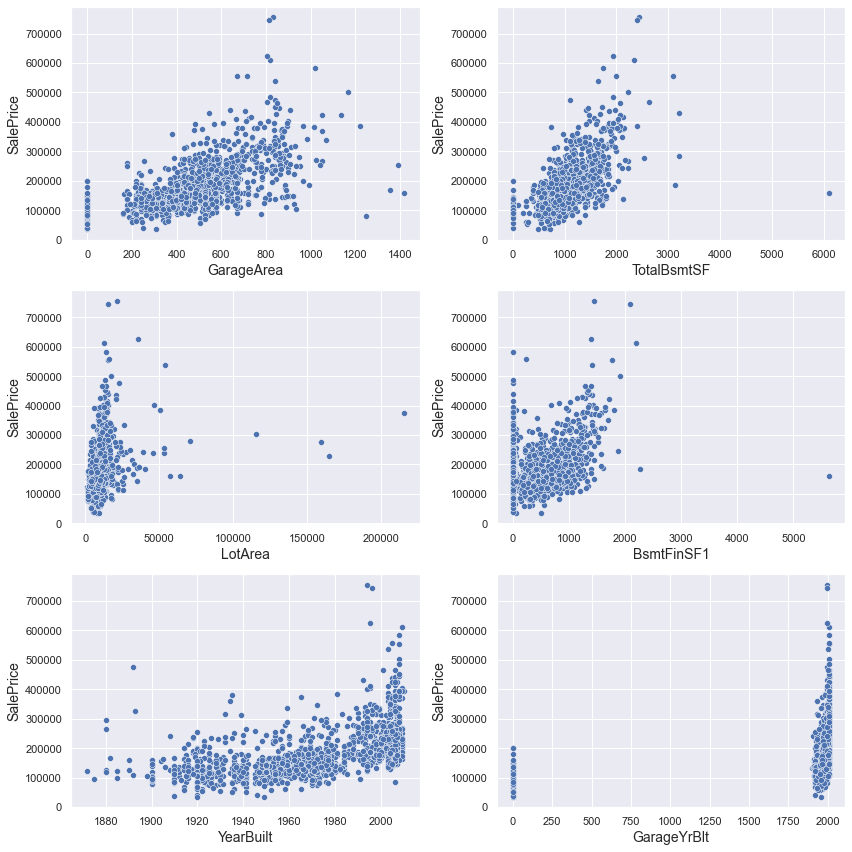

In [153]:
for i,col in enumerate(num_col[1:7]):
    plt.subplot(3,2 ,i+1)
    sb.scatterplot(data[col],data['SalePrice'])
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12, 12)
    plt.xlabel(col, fontsize = 14)
    plt.ylabel('SalePrice', fontsize = 14)
    plt.tight_layout()
plt.show()

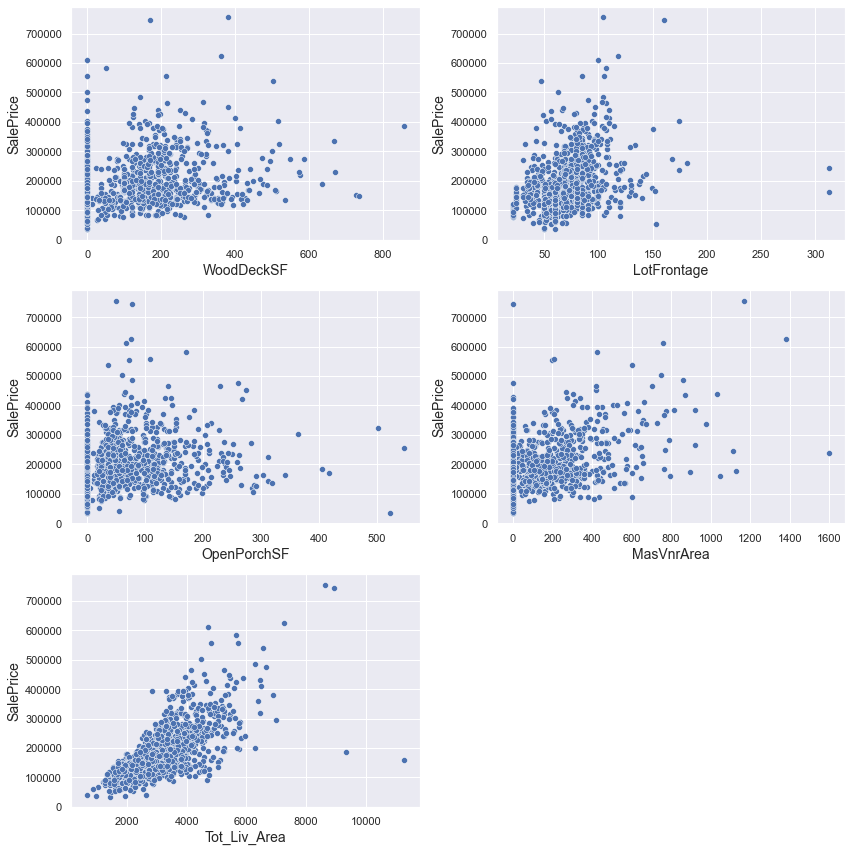

In [154]:
for i,col in enumerate(num_col[7:]):
    plt.subplot(3,2 ,i+1)
    sb.scatterplot(data[col],data['SalePrice'])
    fig, ax = plt.gcf(), plt.gca()
    plt.xlabel(col, fontsize = 14)
    plt.ylabel('SalePrice', fontsize = 14)
    fig.set_size_inches(12, 12)
    plt.tight_layout()
plt.show()

In [155]:
# removing outliers or clusters of outliers
data.drop(data[(data['SalePrice']>=500000)].index,inplace = True)
data.drop(data[(data['Tot_Liv_Area']>8000) & (data['SalePrice']<600000)].index,inplace = True)
data.drop(data[(data['GarageArea']>1200) & (data['SalePrice']<600000)].index,inplace = True)
data.drop(data[(data['TotalBsmtSF']>2500) & (data['SalePrice']<600000)].index,inplace = True)
data.drop(data[(data['LotFrontage']>160) & (data['SalePrice']<600000)].index,inplace = True)
data.drop(data[(data['LotArea']>50000) & (data['SalePrice']<600000)].index,inplace = True)
data.drop(data[(data['BsmtFinSF1']>1750) & (data['SalePrice']<600000)].index,inplace = True)
data.drop(data[(data['WoodDeckSF']>600) & (data['SalePrice']<600000)].index,inplace = True)
data.drop(data[(data['OpenPorchSF']>350) & (data['SalePrice']<600000)].index,inplace = True)
data.drop(data[(data['MasVnrArea']>800) & (data['SalePrice']<600000)].index,inplace = True)

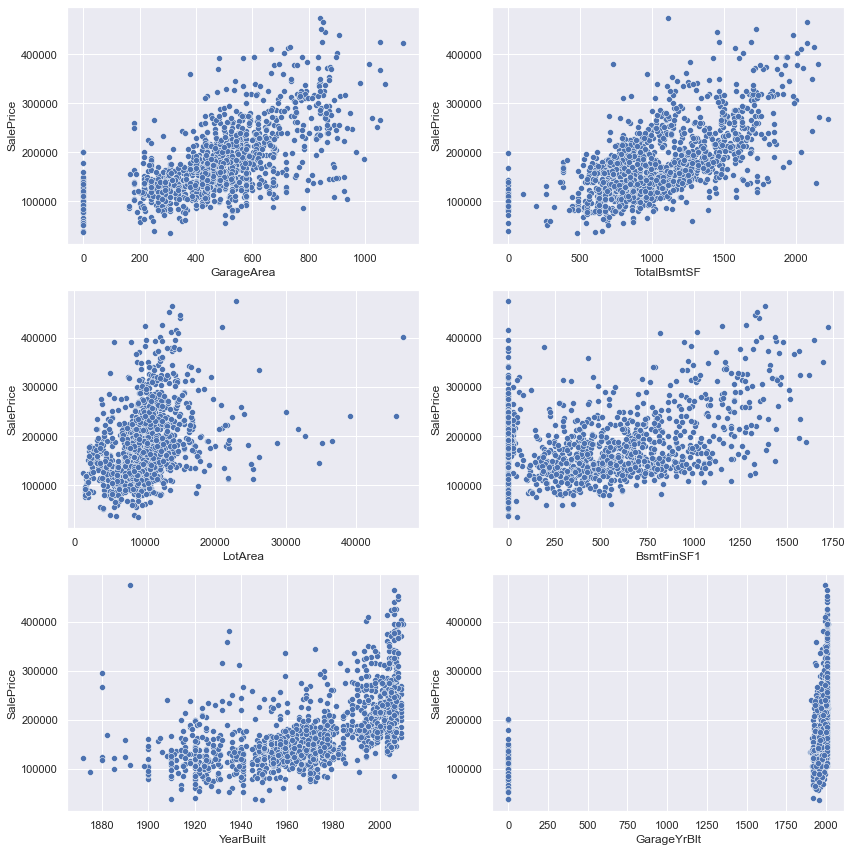

In [156]:
for i,col in enumerate(num_col[1:7]):
    plt.subplot(3,2 ,i+1)
    sb.scatterplot(data[col],data['SalePrice'])
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12, 12)
    plt.tight_layout()
plt.show()

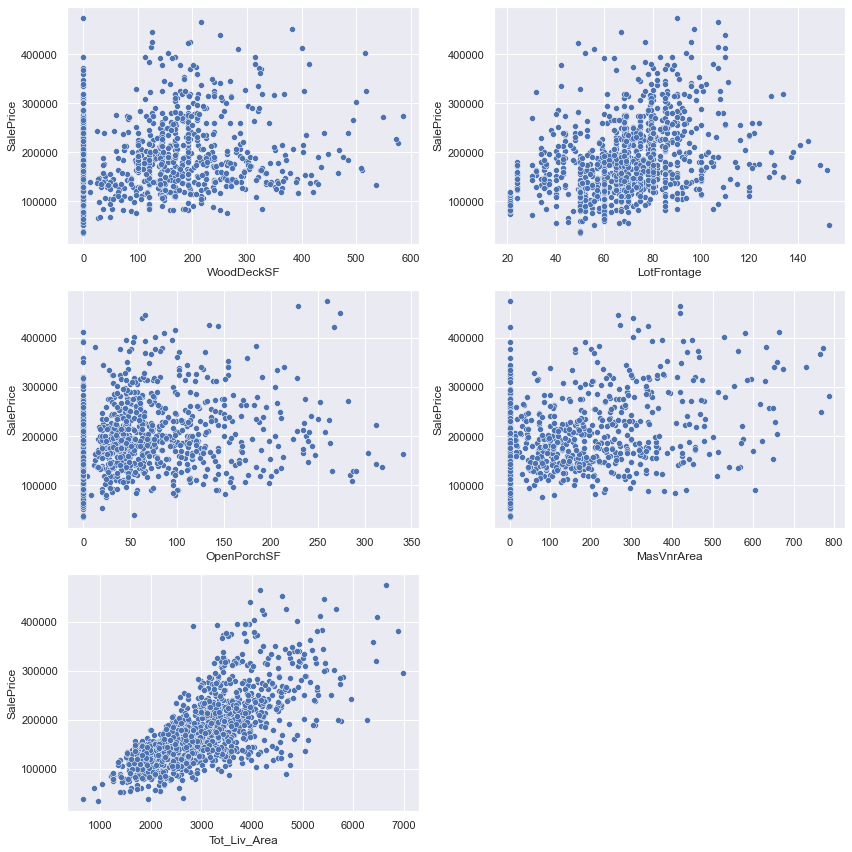

In [157]:
for i,col in enumerate(num_col[7:]):
    plt.subplot(3,2 ,i+1)
    sb.scatterplot(data[col],data['SalePrice'])
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12, 12)
    plt.tight_layout()
plt.show()

In [158]:
# further removing outliers based on above scatter plots
data.drop(data[(data['LotFrontage']>140) & (data['SalePrice']<100000)].index,inplace = True)
data[(data['YearBuilt']>1880)& (data['YearBuilt']<1900)& (data['SalePrice']>400000)]
data.drop(data[(data['YearBuilt']== 1880) & (data['SalePrice']>200000)].index,inplace = True)
data.drop(data[(data['Tot_Liv_Area']< 3000) & (data['SalePrice']>300000)].index,inplace = True)
data.drop(data[(data['LotArea']> 25000) & (data['SalePrice']>300000)].index,inplace = True)
data.drop(data[(data['LotArea']>27500) & (data['SalePrice']<600000)].index,inplace = True)
data.drop(data[(data['LotArea']> 20000) & (data['SalePrice']>400000)].index,inplace = True)
data.drop(data[(data['OpenPorchSF']< 300) & (data['OpenPorchSF']> 200) &  (data['SalePrice']> 400000)].index,inplace = True)

In [159]:
print('No. of outliers removed:',1460-data.shape[0])

No. of outliers removed: 72


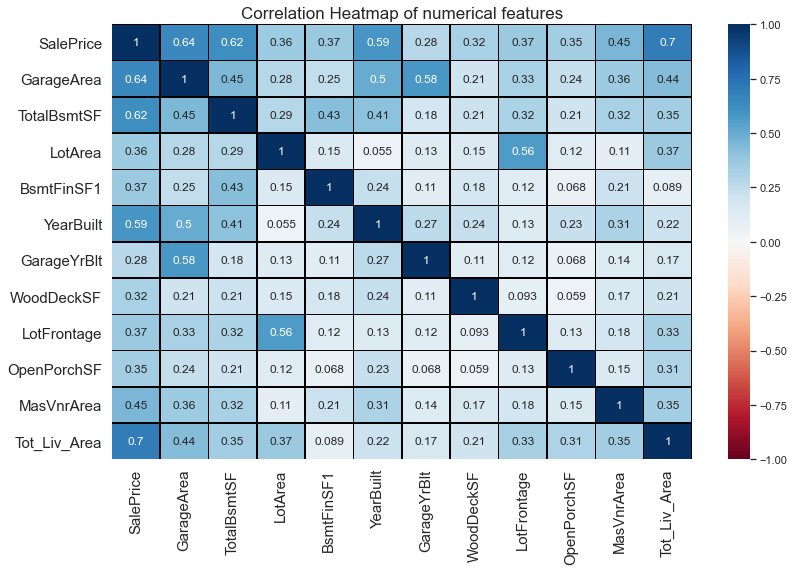

In [160]:
plt.figure(figsize = (13,8))
sb.heatmap(data[num_col].corr(), cmap = 'RdBu', vmin = -1, vmax = 1, center = 0, 
           linewidth = .5, linecolor = 'black', annot = True)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Correlation Heatmap of numerical features', fontsize = 17)
plt.show()

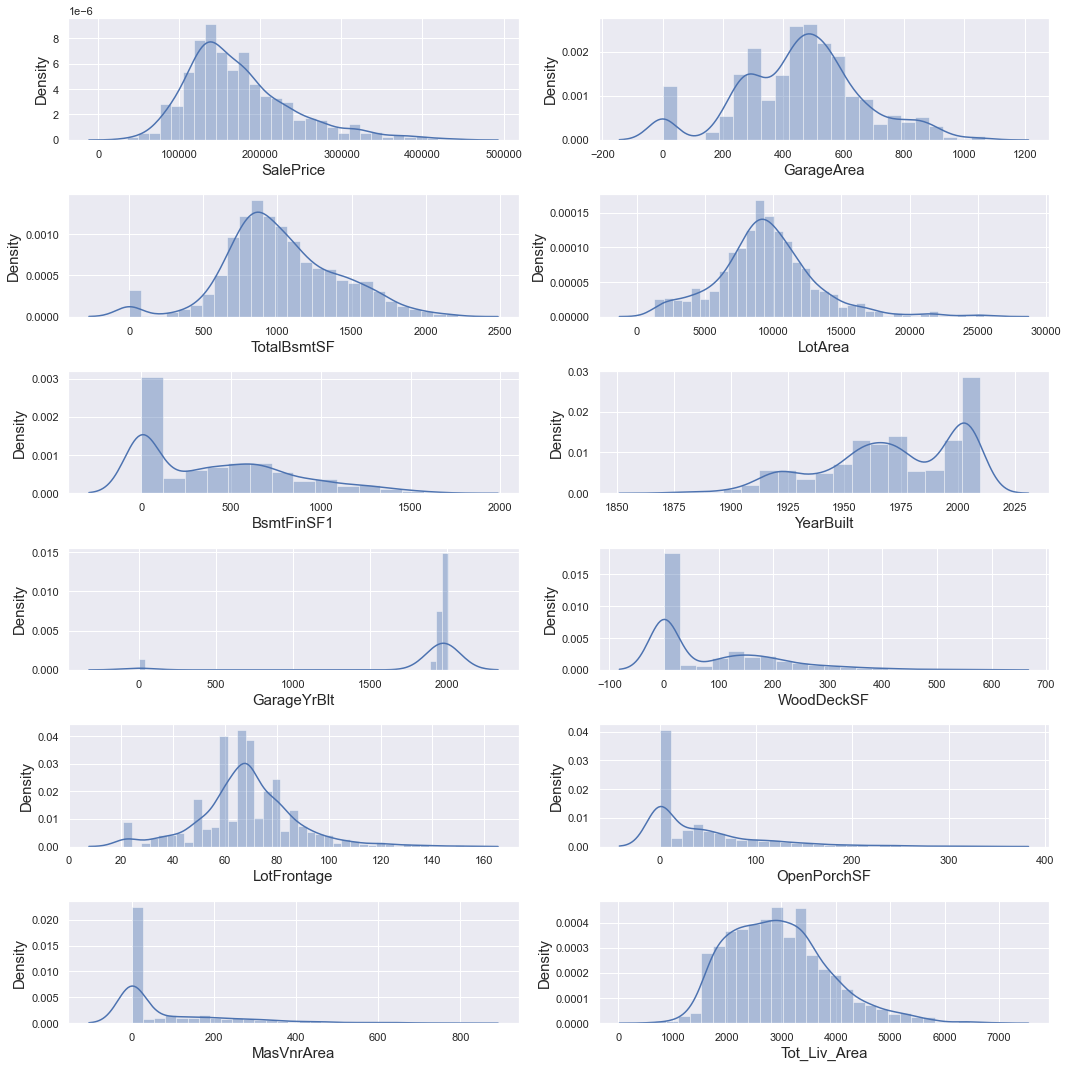

In [161]:
for i,col in enumerate(num_col):
    plt.subplot(6,2 ,i+1)
    sb.distplot(data[col])
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(15, 15)
    plt.xlabel(col,fontsize = 15)
    plt.ylabel('Density',fontsize = 15)
    plt.tight_layout()
plt.show()

In [162]:
data[num_col].skew()

SalePrice       1.099608
GarageArea     -0.049173
TotalBsmtSF     0.113346
LotArea         0.686658
BsmtFinSF1      0.685815
YearBuilt      -0.575563
GarageYrBlt    -3.811458
WoodDeckSF      1.278883
LotFrontage     0.327187
OpenPorchSF     1.771477
MasVnrArea      1.862197
Tot_Liv_Area    0.685350
dtype: float64

In [163]:
# dropping highly skewed column
data.drop('GarageYrBlt',1,inplace =True)
num_col.remove('GarageYrBlt')

In [164]:
# box-cox transforming numeric features having skewness greater than 0.55 and if column not equal to 'SalePrice' and 'YearBuilt'
for col in num_col:
    if col not in ['SalePrice','YearBuilt'] and data[col].skew() > 0.55:
        if col == 'LotArea':
            data[col] = boxcox1p(data[col], 0.65)
        else:
            data[col] = boxcox1p(data[col], 0.1)

In [165]:
data[num_col].skew()

SalePrice       1.099608
GarageArea     -0.049173
TotalBsmtSF     0.113346
LotArea         0.002637
BsmtFinSF1     -0.525631
YearBuilt      -0.575563
WoodDeckSF      0.220236
LotFrontage     0.327187
OpenPorchSF     0.076563
MasVnrArea      0.557722
Tot_Liv_Area   -0.095737
dtype: float64

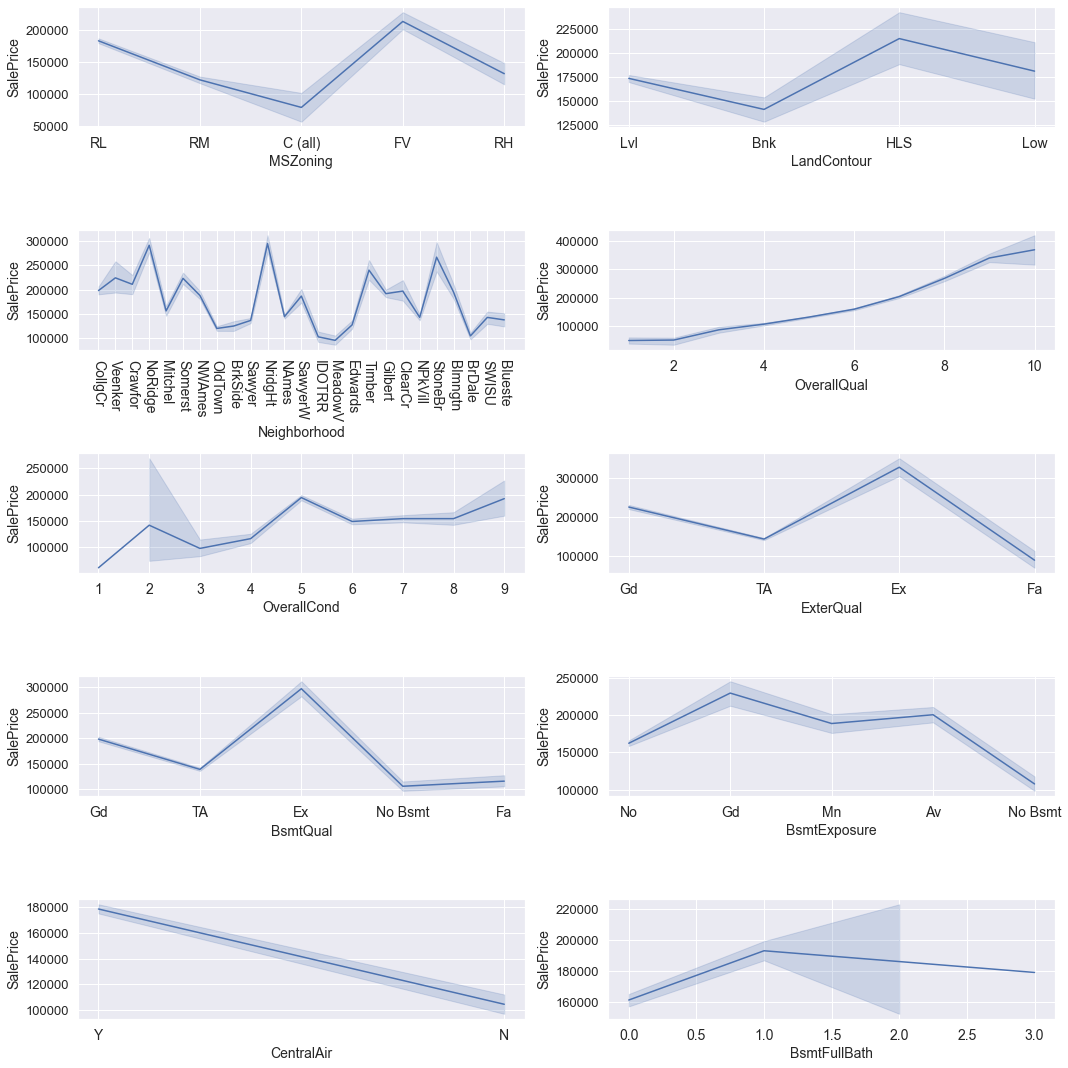

In [166]:
for i,col in enumerate(cat_col[:10]):
    plt.subplot(5,2 ,i+1)
    sb.lineplot(data[col], data['SalePrice'])
    fig, ax = plt.gcf(), plt.gca()
    if col in ['Neighborhood','Exterior1st']:
        plt.xticks(rotation = -90)
    fig.set_size_inches(15, 15)
    plt.xlabel(col, fontsize = 14)
    plt.ylabel('SalePrice', fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 13)
    plt.tight_layout()
plt.show()

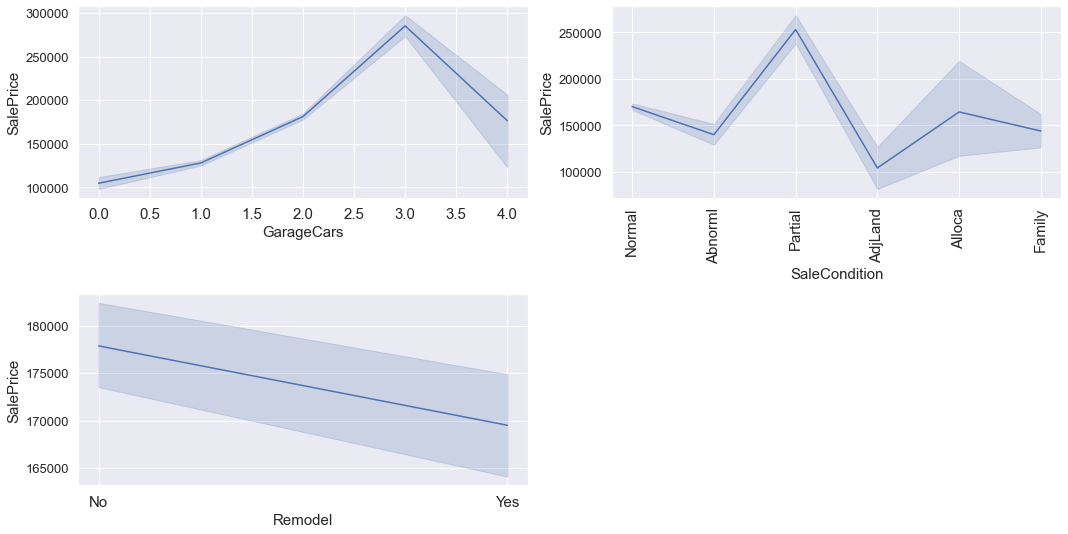

In [167]:
for i,col in enumerate(cat_col[-3:]):
    plt.subplot(4,2 ,i+1)
    sb.lineplot(data[col], data['SalePrice'])
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(15, 15)
    plt.xlabel(col, fontsize = 15)
    if col in ['GarageType','SaleCondition']:
        plt.xticks(fontsize = 15, rotation = 90)
    plt.ylabel('SalePrice', fontsize = 15)   
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 13)
    plt.tight_layout()
plt.show()

In [168]:
# creating 'ordinal' list containing ordinal or discrete variables to robust scale along with other numeric variables 
ordinal = ['GarageCars','HalfBath','FullBath','TotRmsAbvGrd','BedroomAbvGr','Fireplaces','BsmtFullBath', 
          'OverallQual','OverallCond']
for col in ordinal:
    data[col] = data[col].astype(float)

In [169]:
# removing target variable 'SalePrice' from num_col list
num_col.remove('SalePrice')

In [170]:
# defining function to encode categorical columns using target encoding technique
def target_encode(train_df, test_df, col, target, weight):
    df = pd.concat([train_df, target],1)
    # Compute the global mean
    mean = df[target.name].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(col)[ytrain.name].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + weight * mean) / (counts + weight)

    # Replace each value by the according smoothed mean
    if test_df is None:
        return train_df[col].map(smooth)
    else:
        return train_df[col].map(smooth), test_df[col].map(smooth.to_dict())

In [171]:
# Here, we are trying to tune the 'weight' parameter using cross validation on training-set.
xtrain, xtest, ytrain, ytest = train_test_split(data.drop('SalePrice',1), data['SalePrice'], test_size = 0.3,
                                                   random_state = 0, stratify = data['Neighborhood'])

for col in num_col+ordinal:
        scaler = RobustScaler()
        xtrain[col] = scaler.fit_transform(xtrain[col].values.reshape(-1,1))

model = ExtraTreesRegressor(random_state = 0)

weight_list = np.arange(1,5,0.5)
score_list = []
for weight in weight_list:
    xtrain_en = xtrain.copy()
    for col in cat_col:
        if col not in ordinal:
            xtrain_en[col] = target_encode(train_df = xtrain_en, test_df = None, col = col, target  = ytrain, weight = weight)

    score = cross_val_score(model, xtrain_en, ytrain, cv = 10, scoring = 'neg_root_mean_squared_error', n_jobs = -1 ).mean()
    score_list.append(score)
    
optimum_weight = weight_list[np.argmax(score_list)]
print('Optimum cross-val-score:',max(score_list),
      'corresponds to smoothing value of:', optimum_weight)

Optimum cross-val-score: -21692.926942195514 corresponds to smoothing value of: 1.5


In [172]:
# train-test split
xtrain, xtest, ytrain, ytest = train_test_split(data.drop('SalePrice',1), data['SalePrice'], test_size = 0.3,
                                                  random_state = 0, stratify = data['Neighborhood'])

In [173]:
# robust-scaling all features in num_col and ordinal list.
for col in num_col+ordinal:
    scaler = RobustScaler()
    xtrain[col] = scaler.fit_transform(xtrain[col].values.reshape(-1,1))
    xtest[col] = scaler.transform(xtest[col].values.reshape(-1,1))

In [174]:
# target encoding categorical variables
for col in  cat_col:
    if col not in ordinal:
        xtrain[col], xtest[col] =  target_encode(train_df = xtrain, test_df = xtest, col = col, target  = ytrain, weight = optimum_weight)

## Base Model Evaluation

model: RandomForestRegressor(random_state=0)
CV score:0.8791683931571107
score_std: 0.053150304047932674
----------
model: XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
CV score:0.8639657157531259
score_std: 0.06538562268315717
----------
model: ElasticNet()
CV score:0.8463650667710072
score_std: 0.03669508169739792
----------


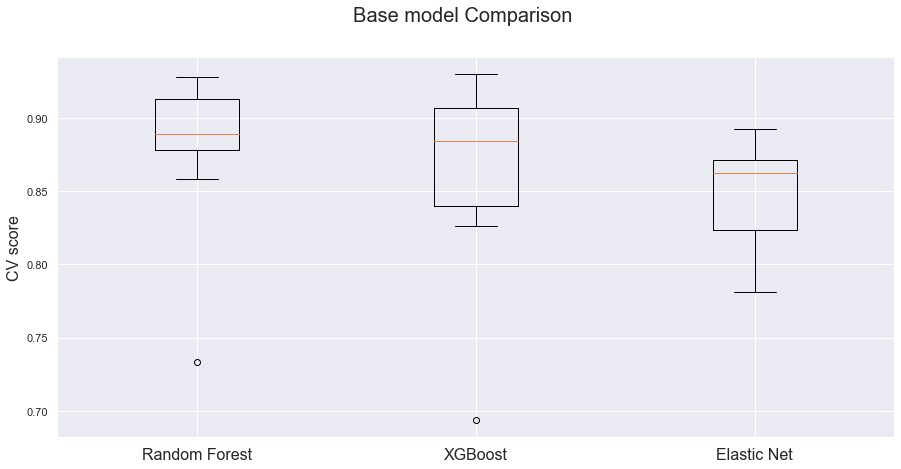

In [175]:
# initializing each model
rfr = RandomForestRegressor(random_state = 0)
xgb = xgboost.XGBRegressor()
elnr = ElasticNet()

models = [rfr,xgb,elnr]

scores = []
for model in models:
    
    score = cross_val_score(model, xtrain, ytrain, cv = 10, scoring = 'r2', n_jobs = -1 )
    mean_score = score.mean()
    std_score = score.std()
    
    print('model: {}'.format(model))
    print('CV score:{}'.format(mean_score))
    print('score_std:',std_score)
    print('----------')
    scores.append(score)
    
fig = plt.figure()
fig.suptitle('Base model Comparison', fontsize = 20)
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(['Random Forest','XGBoost','Elastic Net'],
                  fontsize = 16)
plt.ylabel('CV score', fontsize = 16)
fig.set_size_inches(15,7)
plt.show() 

## Testing

In [176]:
print('*******TRAIN RESULTS*******')
print('\n')

for model in models:
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtrain)
    score = r2_score(ytrain, ypred)
    print('model',model)
    print('accuracy (r2_score):',  round(score*100,2),'%')
    print('mean_absolute_error:',mean_absolute_error(ytrain, ypred))
    print('root_mean_squared_error:',mean_squared_error(ytrain, ypred, squared = False))
    print('-------------------------------------------')

*******TRAIN RESULTS*******


model RandomForestRegressor(random_state=0)
accuracy (r2_score): 98.43 %
mean_absolute_error: 5762.041706144867
root_mean_squared_error: 8429.142977243484
-------------------------------------------
model XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
accuracy (r2_score): 99.98 %
mean_absolute_error: 635.5862955393924
root_mean_squared_error: 929.9408423547077
-------------------------------------------
model ElasticNet()
accuracy (r2_sco

In [177]:
print('*******TEST RESULTS*******')
print('\n')

for model in models:
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    score = r2_score(ytest, ypred)
    print('model',model)
    print('accuracy (r2_score):',  round(score*100,2),'%')
    print('mean_absolute_error:',mean_absolute_error(ytest, ypred))
    print('root_mean_squared_error:',mean_squared_error(ytest, ypred, squared = False))
    print('-------------------------------------------')

*******TEST RESULTS*******


model RandomForestRegressor(random_state=0)
accuracy (r2_score): 90.54 %
mean_absolute_error: 14131.3460911271
root_mean_squared_error: 19966.096198187257
-------------------------------------------
model XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
accuracy (r2_score): 90.56 %
mean_absolute_error: 14549.02207921163
root_mean_squared_error: 19942.245596328416
-------------------------------------------
model ElasticNet()
accuracy (r2_sco

## Hyper-Parameter Tuning

In [178]:
# initializing all model parameters
param_rfr = dict(n_estimators = [10,15,20,25,30,45,50], criterion = ['mse', 'mae'],
                max_depth = [2,3,4,5,6,7,None],min_samples_split = [1,2,3,4,5],
                min_samples_leaf = [1,2,3,4], random_state = [0,1,2,3,4])

param_xgb = dict( learning_rate = [0.001,0.01,0.05],
     max_depth = [10, 12, 15,30],
     min_child_weight = [ 1, 3, 5, 7],
     gamma = [ 0,0.01,0.05, 0.1, 0.2],
     colsample_bytree = [ 0.3, 0.4, 0.5, 0.7],
     reg_alpha = [0.05,0.1,0.5,0.75,1,1.75,2,2.5,3,5],
     reg_lambda = [0.05,0.1,0.5,0.75,1,1.75,2,2.5,3,5]
     )

param_elnr  = dict(alpha = [0.01,0.1,1,10], l1_ratio = [0,.025,0.5,.75,1],normalize = [True, False],
                 selection = ['cyclic','random'],max_iter = [100,200,300,500],
                random_state = [0,1,2,3,4])

In [179]:
# list containing models with their respective parameters
model_param_list = [(rfr, param_rfr), (xgb, param_xgb), (elnr, param_elnr)]

In [180]:
%%time
# tuning all models
tuned_models = []
for model, param in model_param_list:
    
    r_rearch = RandomizedSearchCV(model, param, cv = 10, n_jobs = -1, 
                                  scoring = 'neg_root_mean_squared_error',
                                  random_state = 0)
    r_rearch.fit( xtrain, ytrain.values)
    best_cvscore = r_rearch.best_score_
    best_param = r_rearch.best_params_
    best_estimator = r_rearch.best_estimator_
    tuned_models.append(best_estimator)
    
    print('model:',model)
    print('best_cvscore:',best_cvscore)
    print('best_param:', best_param)
    print('\n')
    
print('best_estimators:',tuned_models)

model: RandomForestRegressor(random_state=0)
best_cvscore: -22718.839635159977
best_param: {'random_state': 0, 'n_estimators': 30, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'mae'}


model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
best_cvscore: -21238.319462686595
best_param: {'reg_lambda': 0.75, 'reg_alpha': 5, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.4}


model: Elast

In [181]:
print('*******TEST RESULTS AFTER HYPER-PARAMETER TUNING********')
print('\n')
mean_absolute_error
for model in tuned_models:
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    score = r2_score(ytest, ypred)
    print('model',model)
    print('r2_score:',  round(score*100,1),'%')
    print('mean_absolute_error:',mean_absolute_error(ytest, ypred))
    print('root_mean_squared_error:',mean_squared_error(ytest, ypred, squared = False))
    print('-------------------------------------------')

*******TEST RESULTS AFTER HYPER-PARAMETER TUNING********


model RandomForestRegressor(criterion='mae', min_samples_split=4, n_estimators=30,
                      random_state=0)
r2_score: 90.9 %
mean_absolute_error: 14131.03417266187
root_mean_squared_error: 19575.711213461163
-------------------------------------------
model XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=5, reg_lambda=0.75, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
r2_score: 92.6 %
mean_absolute_error: 12975.032093075539
root_mean_squared_error: 17703.236001

In [182]:
# selecting best performing model as XGBoost.
selected_model = tuned_models[1]
selected_model.fit(xtrain, ytrain)
ypred = selected_model.predict(xtest)

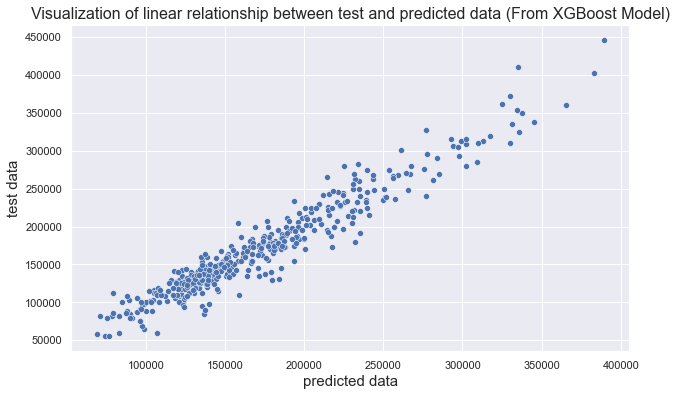

In [183]:
plt.figure(figsize = (10,6))
sb.scatterplot(ypred,ytest )
plt.xlabel('predicted data', fontsize = 15)
plt.ylabel('test data',  fontsize = 15)
plt.title('Visualization of linear relationship between test and predicted data (From XGBoost Model)',fontsize = 16 )
plt.show()

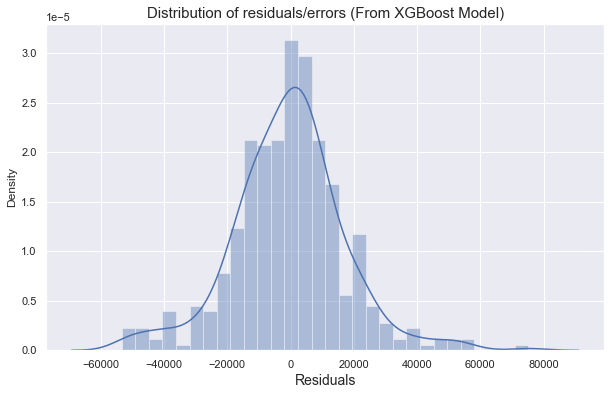

In [184]:
plt.figure(figsize = (10,6))
sb.distplot((ytest-ypred), bins = 30)
plt.xlabel('Residuals', fontsize = 14)
plt.title('Distribution of residuals/errors (From XGBoost Model)',fontsize = 15 )
plt.show()

In [185]:
# perform permutation importance on selected model that is fitted on test set
results = permutation_importance(selected_model, xtest, ytest, scoring='neg_mean_absolute_error', n_repeats = 10, n_jobs = -1)
# get mean feature importance score
importance = results.importances_mean
# compute relative importance
importance = 100.0 * (importance / importance.max())
# forming data-frame containing features with its respective relative importance 
imp_df = pd.concat([pd.Series(xtrain.columns),pd.Series(importance)],1)
imp_df = imp_df.sort_values(1, ascending = False)

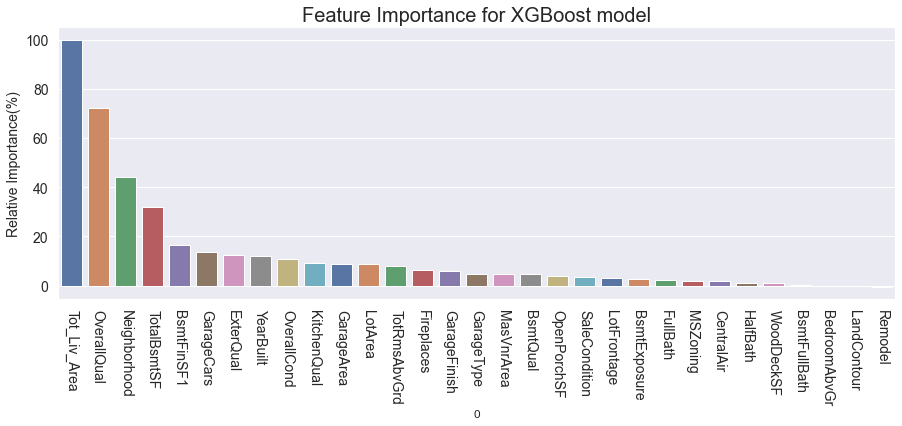

In [186]:
# plotting the result of permutation importance
plt.figure(figsize=(15, 5))
sb.barplot(imp_df.iloc[:,0], imp_df.iloc[:,1], palette = 'deep' )
plt.ylabel('Relative Importance(%)',fontsize = 14)
plt.title('Feature Importance for XGBoost model',fontsize = 20)
plt.xticks(rotation = -90,fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()